In [ ]:
#installing neccessary libraries
%matplotlib inline                              
%config InlineBackend.figure_format = 'retina'  

import time
import json
import copy
import os 

import requests
import cv2
from imutils import paths

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import PIL
from PIL import Image
from collections import OrderedDict

import torch
from torch import nn, optim
from torch.optim import lr_scheduler
from torch.autograd import Variable

import torchvision
from torchvision import datasets, models, transforms

from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F
from scipy.stats import bernoulli

from google.colab import files
import io

In [ ]:
#checking PIL version is higher than 5.3.0
print(PIL.__version__)

#ensuring we on are the GPU, should be true
print(torch.cuda.is_available())

#putting device on the gpu
device = torch.device('cuda:0')

7.1.2
True


# Getting Dataset










Uploading the surfing_data image dataset using the following tutorial: 


[Create Deep Learning Dataset](https://debuggercafe.com/create-your-own-deep-learning-image-dataset/)

The images are uploading into the following file system:
> surfing_data

>>train

>>>barrel

>>>bottom

>> valid

>>>barrel

>>>bottom

The upload currently uses a bernoulli function to put approximately 20% of the images in the validation set and the remaining in the training set.

The dataset currently supports the following classes:


*   Barrel
*   Bottom-turn

In [1]:
#allowing user to upload files with urls putting on local
def upload():
  print('Upload Barrel URL\'s')
  file_dict = files.upload()
  barrel_path = io.BytesIO(file_dict[next(iter(file_dict))])

  print('\nUpload Bottom Turn URL\'s')
  file_dict = files.upload()
  bottom_path = io.BytesIO(file_dict[next(iter(file_dict))])
  return barrel_path, bottom_path

#getting barrel and bottom turn urls
barrel_path, bottom_path = upload()

In [ ]:
#create folder system, see above for descrition

if not os.path.exists('surfing_data'):
    os.mkdir('surfing_data')
    % cd surfing_data/
    os.mkdir('train')
    os.mkdir('valid')

    % cd train/
    os.mkdir('barrel')
    os.mkdir('bottom')
    % cd .. 

    % cd valid/
    os.mkdir('barrel')
    os.mkdir('bottom')
    % cd ..
    % cd ..
    % pwd


/content/surfing_data
/content/surfing_data/train
/content/surfing_data
/content/surfing_data/valid
/content/surfing_data
/content


In [ ]:
tot = 0
l = [0, 
     2, 4]
if tot not in l:
  print('hi')

In [ ]:
################################################################################
     
      # BARREL

################################################################################     

url_path = open('/content/barrel_urls').read().strip().split('\n')
total = 0

#we will 
image_path = ['/content/surfing_data/train/barrel', '/content/surfing_data/valid/barrel']

bad_images = [36, 59, 71, 105, 109, 114, 153, 158, 169, 170, 175, 176, 180, 181, 
              185, 189, 199, 204, 207, 212, 213, 219, 223, 228, 229, 231, 232, 233, 
              244, 246, 250, 254, 255, 256, 267, 269, 273, 277, 282, 285, 286, 291, 
              292, 293, 295, 297, 299, 302, 304, 311, 312, 314, 318, 320, 321, 
              39, 42, 58, 61, 67, 85, 97, 104, 126, 156, 167, 264, 307]

for url in url_path:
    try:
      if total not in bad_images:
        req = requests.get(url, timeout=60)
        #about 20% of the data goes to the validation set
      
        if bernoulli.rvs(.2):
          #validation set
          file_path = os.path.sep.join([image_path[1], '{}.jpg'.format(
              str(total).zfill(6))]
          )
        else:
          #training set
          file_path = os.path.sep.join([image_path[0], '{}.jpg'.format(
              str(total).zfill(6))]
          )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
        print('Downloaded {}'.format(file_path))
      total += 1
    except:
      print('Could not download {}. Downloading next file'.format(file_path))


for imagePath in paths.list_images('images'):
    delete_image = False
    try:
        image = cv2.imread(imagePath)
        if image is None:
            delete_image = True
    # if OpenCV cannot load the image
    except:
        delete_image = True
    if delete_image:
        print('Deleting {}'.format(imagePath))
        os.remove(imagePath)

Downloaded /content/surfing_data/valid/barrel/000000.jpg
Downloaded /content/surfing_data/train/barrel/000001.jpg
Downloaded /content/surfing_data/train/barrel/000002.jpg
Downloaded /content/surfing_data/train/barrel/000003.jpg
Downloaded /content/surfing_data/train/barrel/000004.jpg
Downloaded /content/surfing_data/train/barrel/000005.jpg
Downloaded /content/surfing_data/train/barrel/000006.jpg
Downloaded /content/surfing_data/valid/barrel/000007.jpg
Downloaded /content/surfing_data/train/barrel/000008.jpg
Downloaded /content/surfing_data/train/barrel/000009.jpg
Downloaded /content/surfing_data/train/barrel/000010.jpg
Downloaded /content/surfing_data/train/barrel/000011.jpg
Downloaded /content/surfing_data/train/barrel/000012.jpg
Downloaded /content/surfing_data/train/barrel/000013.jpg
Downloaded /content/surfing_data/train/barrel/000014.jpg
Downloaded /content/surfing_data/valid/barrel/000015.jpg
Downloaded /content/surfing_data/train/barrel/000016.jpg
Downloaded /content/surfing_dat

In [ ]:
################################################################################
     
      # BOTTOM TURN

################################################################################     

url_path = open('/content/bottom_urls').read().strip().split('\n')
total = 0

image_path = ['/content/surfing_data/train/bottom', '/content/surfing_data/valid/bottom']

bad_images = [12, 13, 16, 18, 21, 28, 32, 44, 53, 61, 67, 69, 77, 79, 81, 87, 89, 
              106, 107, 111, 113, 116, 118, 120, 122, 125, 132, 143, 170, 157, 185, 
              196, 197, 203, 206, 207, 211, 217, 226, 231, 232, 248, 258, 263, 268, 
              272, 273, 287, 288, 308, 312, 319, 54, 70, 126, 129, 131, 140, 141, 
              142, 180, 181, 186, 187, 210, 214, 317]

for url in url_path:
    try:
      if total not in bad_images:
        req = requests.get(url, timeout=60)
        #about 20% of the data goes to the validation set
        if bernoulli.rvs(.2):
          #validation set
          file_path = os.path.sep.join([image_path[1], '{}.jpg'.format(
              str(total).zfill(6))]
          )
        else:
          #training set
          file_path = os.path.sep.join([image_path[0], '{}.jpg'.format(
              str(total).zfill(6))]
          )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
        print('Downloaded {}'.format(file_path))
      total += 1
    except:
      print('Could not download {}. Downloading next file'.format(file_path))


for imagePath in paths.list_images('images'):
    delete_image = False
    try:
        image = cv2.imread(imagePath)
        if image is None:
            delete_image = True
    # if OpenCV cannot load the image
    except:
        delete_image = True
    if delete_image:
        print('Deleting {}'.format(imagePath))
        os.remove(imagePath)

Downloaded /content/surfing_data/train/bottom/000000.jpg
Downloaded /content/surfing_data/train/bottom/000001.jpg
Downloaded /content/surfing_data/train/bottom/000002.jpg
Downloaded /content/surfing_data/train/bottom/000003.jpg
Downloaded /content/surfing_data/train/bottom/000004.jpg
Downloaded /content/surfing_data/train/bottom/000005.jpg
Downloaded /content/surfing_data/train/bottom/000006.jpg
Downloaded /content/surfing_data/train/bottom/000007.jpg
Downloaded /content/surfing_data/train/bottom/000008.jpg
Downloaded /content/surfing_data/train/bottom/000009.jpg
Downloaded /content/surfing_data/train/bottom/000010.jpg
Downloaded /content/surfing_data/train/bottom/000011.jpg
Downloaded /content/surfing_data/train/bottom/000014.jpg
Downloaded /content/surfing_data/train/bottom/000015.jpg
Downloaded /content/surfing_data/train/bottom/000017.jpg
Downloaded /content/surfing_data/train/bottom/000019.jpg
Downloaded /content/surfing_data/train/bottom/000020.jpg
Downloaded /content/surfing_dat

In [ ]:
# Deleted barrel 36, 59, 71, 105, 109, 114, 153, 158, 169, 170, 175, 176, 180, 181, 185, 189, 199, 204, 207, 212, 213, 219, 223
# 228, 229, 231, 232, 233, 244, 246, 250, 254, 255, 256, 267, 269, 273, 277, 282, 285, 286, 291, 292, 293, 295, 297, 299, 302, 304, 311, 312
# 314, 318, 320, 321
#
# barrel 39, 42, 58, 61, 67, 85, 97, 104, 126, 156, 167, 264, 307 moved to bottom turn

# 307 is a good example

# Deleted bottom 12, 13, 16, 18, 21, 28, 32, 44, 53, 61, 67, 69, 77, 79, 81, 87, 89, 106, 107, 111, 113, 116, 118, 120, 122, 125, 132, 143, 170
# 157, 185, 196, 197, 203, 206, 207, 211, 217, 226, 231, 232, 248, 258, 263, 268, 272, 273, 287, 288, 308, 312, 319
#
# bottom 54, 70, 126, 129, 131, 140, 141, 142, 180, 181, 186, 187, 210, 214, 317 moved to barrel

In [ ]:
#this allows us to test to make sure our data loader has images, save for later
#mean and std from densenet documentation
"""
t_mean = [ 0.0544, -0.2902, -0.4070] #[0.485, 0.456, 0.406]
t_std = [1.3696, 1.1710, 1.2887] #[0.229, 0.224, 0.225]

v_mean = [ 0.1408, -0.1880, -0.3089]
v_std = [1.2962, 1.0982, 1.2787]
"""
#dictionary corresponding to our tensor transformations for each data type

my_transforms = {
    'train': transforms.Compose([
                                   #transforms.ToPILImage(),
                                   #transforms.RandomRotation((-160, 160)),
                                   transforms.CenterCrop(size = 250
                                                        ),
                                   transforms.RandomHorizontalFlip(p = 0.5),
                                   transforms.ToTensor()
                                   #transforms.Normalize(t_mean, t_std)
  ]), 
  'valid': transforms.Compose([
                               transforms.Resize(256),
                               transforms.CenterCrop(250),
                               transforms.ToTensor()
                               #transforms.Normalize(v_mean, v_std)
  ])
}

In [ ]:
image_datasets['valid']

Dataset ImageFolder
    Number of datapoints: 95
    Root location: /content/surfing_data/valid
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(250, 250))
               ToTensor()
           )

In [ ]:
#getting each dataset
#replaced '/content/flower_data' with '/content/surfing_data'

image_datasets = {x: datasets.ImageFolder(os.path.join('/content/surfing_data', x),
                                          my_transforms[x])
                  for x in ['train', 'valid']}

#saving information for dataloader and model
batch_size = 64
model = models.resnet152(pretrained=True)

#only care about classification params, so setting feature params to False
for param in model.parameters():
  param.requires_grad = False

#data elements in dataloader have dim (batch_size, 3, 224, 224)
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'valid']}

#saving class names, int between 1 and 102, FIXME for surfing classification
class_names = image_datasets['train'].classes
num_classes = len(class_names)

#saving the length of each of my datasets
data_sizes = {x : len(image_datasets[x]) for x in ['train', 'valid']}


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# Get Mean for Normalization


In [ ]:
#finding mean/std for transforms.Normalize
def get_mean_std(loader):
  """
  Commenting out the transforms.Normalize in transforms.Compose to find
  the mean and standard deviation of the dataset for normalization. 
  
  Returns:
    mean: mean of each channel
    std: std of each channel, found my formula
         var[x] = E[x**2] - E[x]**2

  """
  channels_sum, channels_squares_sum, num_batches = 0, 0, 0

  #iterating through loader
  for data, _ in loader:
    channels_sum += torch.mean(data, dim = [0, 2, 3])
    channels_squares_sum += torch.mean(data**2, dim = [0,2,3])

    num_batches += 1

  #finding mean and std
  mean = channels_sum/num_batches
  std = (channels_squares_sum/num_batches - mean**2)**0.5

  return mean, std 
  
print(get_mean_std(dataloaders['train']))
print(get_mean_std(dataloaders['valid']))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


(tensor([0.3519, 0.4213, 0.4447]), tensor([0.3249, 0.3288, 0.3444]))
(tensor([0.4582, 0.5732, 0.6129]), tensor([0.2830, 0.2301, 0.2385]))


# Testing

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


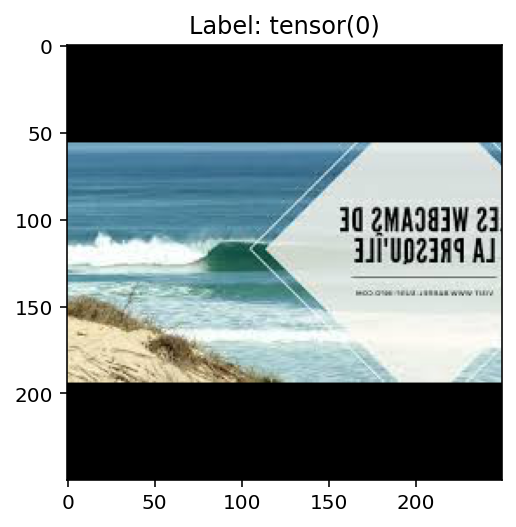

In [ ]:
#this allows us to test to make sure our data loader has images, save for later
def testing_dataloader():
  data, labels = next(iter(dataloaders['train']))
  rand_idx = np.random.randint(data.shape[0])

  #data[rand_idx] is currently 3 x 244 x 244, needs to be 244 x 244 x 3
  img = torch.transpose(data[rand_idx], 0, 1)
  img = torch.transpose(img, 1, 2)

  img_title = 'Label: ' + str(labels[rand_idx])

  plt.imshow(img)
  plt.title(img_title)

testing_dataloader()

#Training


In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs, best_acc):
  #modeled after documentation: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

  #tracking training time
  since = time.time()

  #saving best weights and resetting best accuracy
  best_model_wts = copy.deepcopy(model.state_dict())
  #best_acc = 0.0

  train_accuracies = []
  valid_accuracies = []

  for epoch in range(num_epochs):
    print('------------- Epoch {}/{} -------------'.format(epoch + 1, num_epochs))
    for phase in ['train', 'valid']:
      if phase == 'train':
        model.train()
      else:
        model.eval()
      
      #resetting loss, number correct, and total
      running_loss = 0.0
      running_corrects = 0
      tot = 0

      for inputs, labels in dataloaders[phase]:
        #putting on cuda
        inputs = inputs.to(device)
        labels = labels.to(device)

        #resetting optimizer
        optimizer.zero_grad()

        #if training turning gradient calculation on
        with torch.set_grad_enabled(phase == 'train'): 
          outputs = model(inputs)

          _, preds = torch.max(outputs, 1)
          loss = criterion(outputs, labels)

        #updating loss and the number correct
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        tot 

        if phase == 'train':
          loss.backward()
          optimizer.step()
          #train_accuracies.append(running_corrects / len(preds))
        
        #else:
          #valid_accuracies.append(running_corrects / len(preds))
      
      #updating learning rate with scheduler
      #if phase == 'train':
        #scheduler.step()
      
      #calculating epoch loss and accuracy
      epoch_loss = running_loss / data_sizes[phase]
      epoch_acc = running_corrects.double() / data_sizes[phase]
      print('Phase: {} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
      print()

      #saving best weights
      if phase == 'valid' and epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model_wts = copy.deepcopy(model.state_dict())
    
    #printing information
    time_elapsed = time.time() - since
    print('Running Time Total {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print()

    print('Best val Acc: {:4f}'.format(best_acc))
    print() 

    #updating the model
    model.load_state_dict(best_model_wts)
  return model, train_accuracies, valid_accuracies, best_acc


In [ ]:
#updating so resnet outputs to appropriate number of layers
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)   #switch with number of classes

step_size = 7
gamma = 0.1
best_acc = 0.0

#putting on cuda
model.to(device)

#defining model info
criterion = nn.CrossEntropyLoss()
scheduler = None #optim.lr_scheduler.StepLR(optimizer, step_size, gamma)

In [ ]:
#training so far
#ran 30 epochs on .1 learning rate
#I ran 60 epochs with learning rate .001
#then ran an additional 30 epochs with learning rate .0001
#then ran and additional 2 epochs with learning rate .00005

#ran with .00001 lr for about 15 epochs
#then ran .001 lr for about 10 epochs
learning_rate = .01
num_epochs = 15

optimizer = optim.Adam(model.parameters(), learning_rate)
model, train_acc, valid_acc, best_acc = train_model(model, criterion, optimizer, scheduler, num_epochs, best_acc)

------------- Epoch 1/15 -------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Phase: train Loss: 4.1677 Acc: 0.4552

Phase: valid Loss: 2.9341 Acc: 0.4211

Running Time Total 0m 6s

Best val Acc: 0.421053

------------- Epoch 2/15 -------------
Phase: train Loss: 2.6054 Acc: 0.5593

Phase: valid Loss: 1.2115 Acc: 0.5789

Running Time Total 0m 12s

Best val Acc: 0.578947

------------- Epoch 3/15 -------------
Phase: train Loss: 1.2127 Acc: 0.6150

Phase: valid Loss: 0.3525 Acc: 0.8316

Running Time Total 0m 19s

Best val Acc: 0.831579

------------- Epoch 4/15 -------------
Phase: train Loss: 0.5841 Acc: 0.7821

Phase: valid Loss: 0.8830 Acc: 0.7474

Running Time Total 0m 25s

Best val Acc: 0.831579

------------- Epoch 5/15 -------------
Phase: train Loss: 0.4542 Acc: 0.7869

Phase: valid Loss: 0.3745 Acc: 0.8105

Running Time Total 0m 32s

Best val Acc: 0.831579

------------- Epoch 6/15 -------------
Phase: train Loss: 0.5092 Acc: 0.7869

Phase: valid Loss: 0.4283 Acc: 0.8105

Running Time Total 0m 38s

Best val Acc: 0.831579

------------- Epoch 7/15 -------

In [ ]:
        ,,lpo#training so far
#ran 30 epochs on .1 learning rate
#I ran 60 epochs with learning rate .001
#then ran an additional 30 epochs with learning rate .0001
#then ran and additional 2 epochs with learning rate .00005

#ran with .00001 lr for about 15 epochs
#then ran .001 lr for about 10 epochs
learning_rate = .01
num_epochs = 10

optimizer = optim.Adam(model.parameters(), learning_rate)
model, train_acc, valid_acc, best_acc = train_model(model, criterion, optimizer, scheduler, num_epochs, best_acc)

------------- Epoch 1/10 -------------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Phase: train Loss: 2.2883 Acc: 0.6441

Phase: valid Loss: 1.0129 Acc: 0.7474

Running Time Total 0m 6s

Best val Acc: 0.852632

------------- Epoch 2/10 -------------
Phase: train Loss: 1.0383 Acc: 0.6465

Phase: valid Loss: 0.4703 Acc: 0.8526

Running Time Total 0m 13s

Best val Acc: 0.852632

------------- Epoch 3/10 -------------
Phase: train Loss: 0.5857 Acc: 0.7676

Phase: valid Loss: 0.3990 Acc: 0.8211

Running Time Total 0m 19s

Best val Acc: 0.852632

------------- Epoch 4/10 -------------
Phase: train Loss: 0.4735 Acc: 0.7893

Phase: valid Loss: 0.4012 Acc: 0.8421

Running Time Total 0m 26s

Best val Acc: 0.852632

------------- Epoch 5/10 -------------
Phase: train Loss: 0.5291 Acc: 0.7700

Phase: valid Loss: 0.3896 Acc: 0.8421

Running Time Total 0m 32s

Best val Acc: 0.852632

------------- Epoch 6/10 -------------
Phase: train Loss: 0.5522 Acc: 0.7506

Phase: valid Loss: 0.3947 Acc: 0.8316

Running Time Total 0m 38s

Best val Acc: 0.852632

------------- Epoch 7/10 -------

# Evaluating Model

In [ ]:
model.eval()

accuracy = 0
for inputs, labels in dataloaders['valid']:
  inputs = inputs.to(device)
  labels = labels.to(device)
  outputs = model(inputs)

  #class with the highest probability is our predicted class, size of batch_size
  #outputs.max(1)[1] returns class indicies of highest probability
  equality = (labels.data == outputs.max(1)[1])

  #num of correct predictions divided by all predictions for batch
  accuracy += equality.type_as(torch.FloatTensor()).mean()

#calculating average batch accuracy
print('Test accuracy: {:.3f}'.format(accuracy/len(dataloaders['valid'])))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Test accuracy: 0.821


In [ ]:
outputs.max(1)[1]

tensor([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0], device='cuda:0')

In [ ]:
inputs.shape

torch.Size([11, 3, 250, 250])

In [ ]:
outputs

tensor([[-0.2498,  0.5766],
        [ 1.1191, -0.5769],
        [ 0.9248, -0.7396],
        [ 0.3522, -0.2457],
        [-0.6065,  0.4171],
        [-0.0300,  0.3650],
        [ 1.6276, -1.1048],
        [ 2.3140, -1.3536],
        [ 0.0886,  0.1070],
        [ 1.6710, -1.4432],
        [ 0.2578,  0.2402]], device='cuda:0', grad_fn=<AddmmBackward>)

# Saving Checkpoint

In [ ]:
model.class_to_idx = image_datasets['train'].class_to_idx

checkpoint = {'input_size': 2208,
              'output_size': num_classes,
              'epochs': num_epochs,
              'batch_size': 64,
              'model': models.resnet152(pretrained=True),
              'model.fc' : nn.Linear(num_ftrs, num_classes),
              'optimizer': optimizer.state_dict(),
              'state_dict': model.state_dict(),
              'class_to_idx': model.class_to_idx
             }
   
torch.save(checkpoint, 'checkpoint.pth')

ckpt = torch.load('checkpoint.pth')
ckpt.keys()

image_size = 224
# Values you used for normalizing the images. Default here are for
# pretrained models from torchvision.
norm_mean = [ 0.1408, -0.1880, -0.3089]       #[0.485, 0.456, 0.406]
norm_std = [1.2962, 1.0982, 1.2787]           #[0.229, 0.224, 0.225]
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


def load_checkpoint(filepath, map_location='cpu'):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.fc = checkpoint['model.fc']
    model.load_state_dict(checkpoint['state_dict'])
    model.class_to_idx = checkpoint['class_to_idx']
    optimizer = checkpoint['optimizer']
    epochs = checkpoint['epochs']
    
    for param in model.parameters():
        param.requires_grad = False
        
    return model, checkpoint['class_to_idx']

model, class_to_idx = load_checkpoint('checkpoint.pth')

FileNotFoundError: ignored

# Testing on a Flower

In [ ]:
"""
'/content/surfing_data/train/barrel/000012.jpg' 
and 
'/content/surfing_data/train/barrel/000007.jpg'
train really cool

'/content/surfing_data/valid/barrel/000002.jpg'

"""

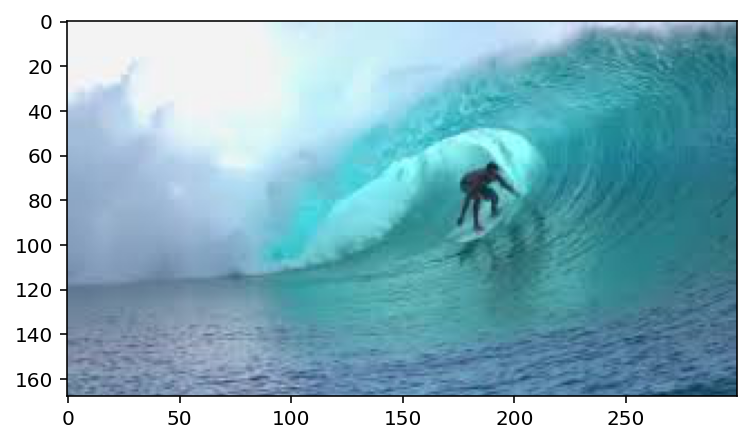

In [ ]:
image_path = '/content/surfing_data/train/barrel/000030.jpg'
img = Image.open(image_path)
def process_image(image):
    """ 
    scales, crops, and normalizes a PIL image for a PyTorch model,
    returns an Numpy array

    """
    #process a PIL image for use in a model
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[ 0.1408, -0.1880, -0.3089],  #[0.485, 0.456, 0.406], CHANGE FROM FIND MEAN
                             std=[1.2962, 1.0982, 1.2787])      #[0.229, 0.224, 0.225]), CHANGE FROM FIND MEAN
    ])
    image = preprocess(image)
    return image

def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    #color is in third dim
    image = image.numpy().transpose((1, 2, 0))
    
    #undo preprocessing
    mean = np.array([ 0.1408, -0.1880, -0.3089])   #[0.485, 0.456, 0.406]), CHANGE FROM FIND MEAN
    std = np.array([1.2962, 1.0982, 1.2787])       #[0.229, 0.224, 0.225]), CHANGE FROM FIND MEAN
    image = std * image + mean
    
    #image needs to be clipped between 0 and 1 or it looks like noise when displayed
    #images smaller than 0 become 0, images larger than 1 become 1
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax


with Image.open(image_path) as image:
    #displaying image to predict
    plt.imshow(image)

In [ ]:
def class_to_name(c):
  classes_dict = {
      0 :'barrel',
      1 :'bottom turn'
  }
  return [classes_dict[i] for i in c]


In [ ]:
def predict2(image_path, model, topk=2):
  """ 
  Predict the class (or classes) of an image using a trained deep learning model.
  """
  
  #implement the code to predict the class from an image file
  img = Image.open(image_path)

  #processing image to pass through model
  img = process_image(img)
  
  #convert 2D image to 1D vector
  #goes from 3 x 224 x 224 to 1 x 3 x 224 x 224
  img = np.expand_dims(img, 0)
  
  #changing from numpy to tensor 
  img = torch.from_numpy(img)
  
  #putting in evaluation if not already in
  model.eval()

  #putting on cuda
  inputs = Variable(img).to(device)

  #passing through model
  logits = model.forward(inputs)
  
  #finding probability of each output
  ps = F.softmax(logits,dim=1)

  #getting largest topk elements
  topk = ps.cpu().topk(topk)
  
  #returning in list form
  return (i.data.numpy().squeeze().tolist() for i in topk)


probs, classes = predict2(image_path, model.to(device))
print(probs)
print(class_to_name(classes))
#before got .7495 and .2504

[0.9999572038650513, 4.2768671846715733e-05]
['barrel', 'bottom turn']


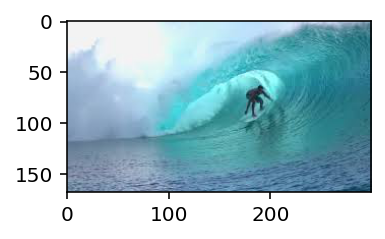

In [ ]:
sb = plt.subplot(1,2,1)
sb.imshow(image)
sb = plt.subplot(1,2,2)
sb.barh()
plt.show()